In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# Generate the data and save to CSV
df =pd.read_csv('synthetic_permeability__data.csv')
df.to_csv('synthetic_permeability__data.csv', index=False)

In [3]:
# Generate the data
synthetic_permeability_data = df
print("--- Synthetic Permeability Data (First 5 rows) ---")
print(synthetic_permeability_data.head())

--- Synthetic Permeability Data (First 5 rows) ---
       Depth_m  Porosity_v/v  Vshale_v/v  Permeability_mD
0  1000.000000      0.196816    0.302025         2.176492
1  1000.200200      0.184600    0.277036         3.012947
2  1000.400400      0.200804    0.232535         3.008930
3  1000.600601      0.218796    0.195959         7.187785
4  1000.800801      0.184140    0.261972         0.794720


In [4]:
# --- Prepare Data for ML ---
features = ["Porosity_v/v", "Vshale_v/v"]
X = synthetic_permeability_data[features]
# Note: We predict log(Permeability) as it often performs better
y = np.log(synthetic_permeability_data["Permeability_mD"]) 

In [5]:
# Split data into training and testing sets (simulating core data for training)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
# Scale features (important for many ML models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(f"\nTraining samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")


Training samples: 700
Testing samples: 300


In [7]:
# --- Apply Random Forest Regressor ---
print("\n--- Training Random Forest Regressor for Permeability Estimation ---")
# Initialize and train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train_scaled, y_train)
# Make predictions on the test set
y_pred_log = model.predict(X_test_scaled)
y_pred = np.exp(y_pred_log) # Convert back from log permeability


--- Training Random Forest Regressor for Permeability Estimation ---


In [11]:
# Evaluate the model
mse = mean_squared_error(np.exp(y_test), y_pred)
print(f"Mean Squared Error (Permeability): {mse:.2f}")

Mean Squared Error (Permeability): 292.75



Saved permeability estimation plot to permeability_estimation.png


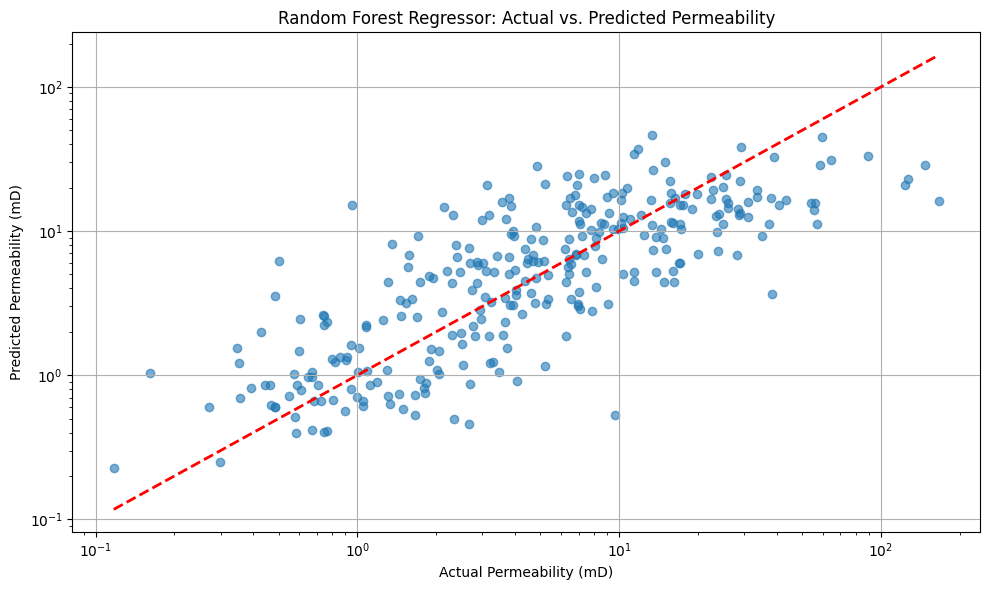

In [8]:
# --- Visualization of Predictions vs. Actual ---
plt.figure(figsize=(10, 6))
plt.scatter(np.exp(y_test), y_pred, alpha=0.6)
plt.plot([np.exp(y_test).min(), np.exp(y_test).max()], [np.exp(y_test).min(),
np.exp(y_test).max()], '--r', linewidth=2) # 1:1 line
plt.xlabel("Actual Permeability (mD)")
plt.ylabel("Predicted Permeability (mD)")
plt.title("Random Forest Regressor: Actual vs. Predicted Permeability")
plt.yscale('log') # Permeability often plotted on log scale
plt.xscale('log') # Permeability often plotted on log scale
plt.grid(True)
plt.tight_layout()
# plt.show()
plt.savefig('permeability_estimation.png')
print("\nSaved permeability estimation plot to permeability_estimation.png")

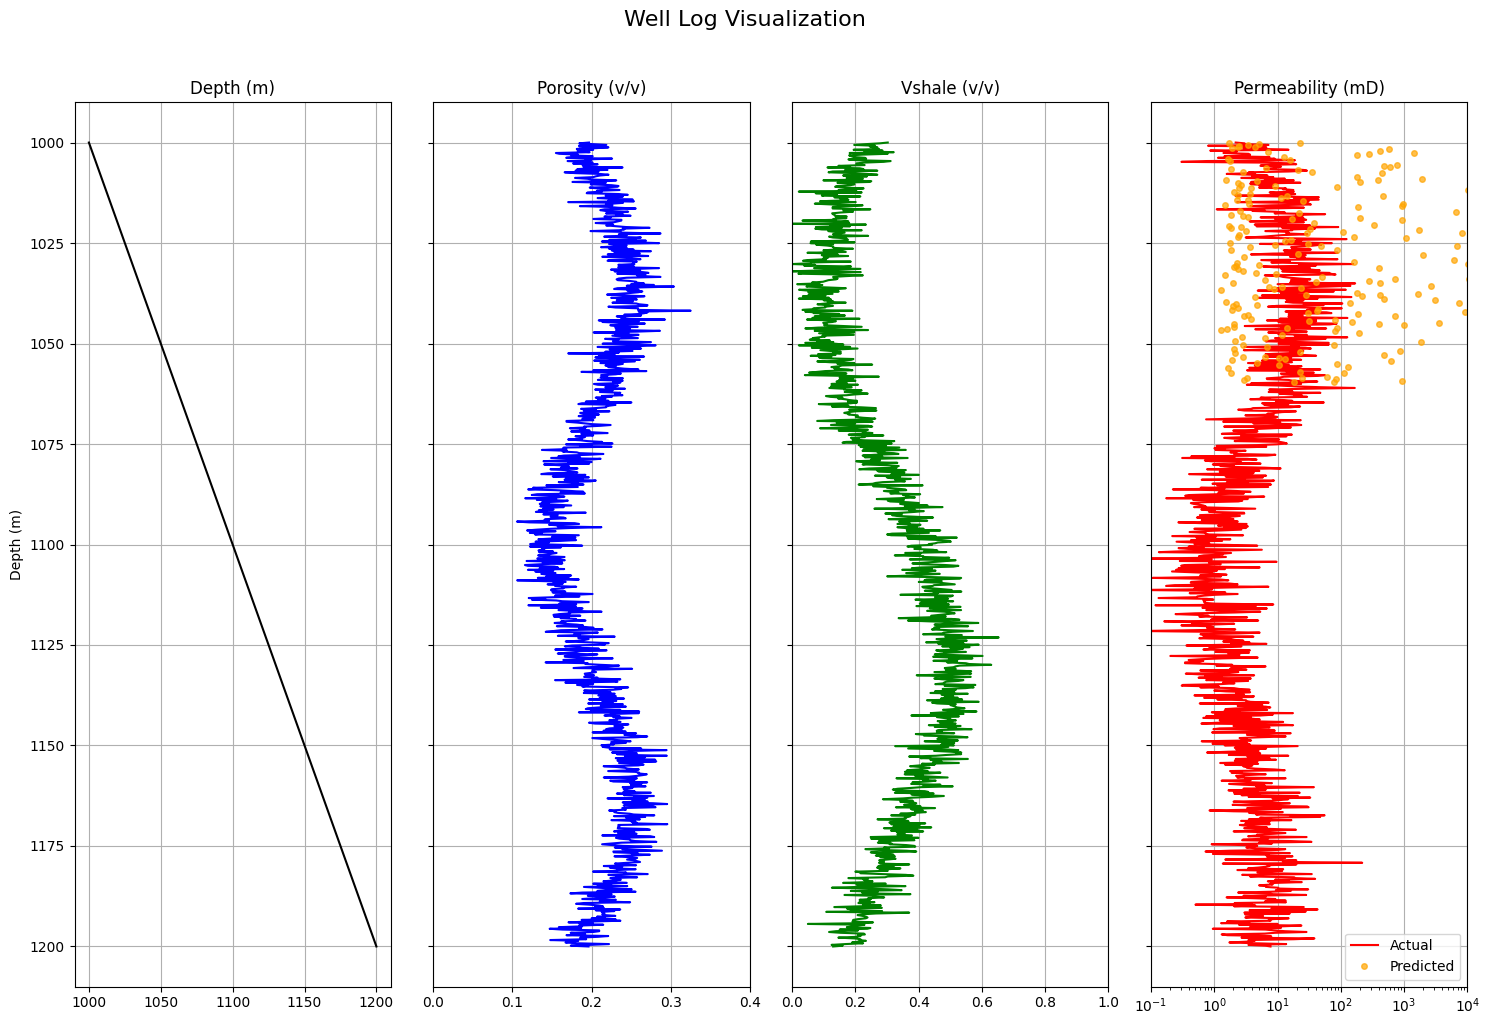

In [9]:
def plot_well_logs(df, y_pred=None):
    """
    Visualize well logs with 4 tracks: Depth, Porosity, Vshale, Permeability (actual vs predicted)
    
    Parameters:
    df (DataFrame): Contains well log data
    y_pred (array): Optional array of predicted permeability values (can be shorter than df)
    """
    # Create figure and subplots
    fig, ax = plt.subplots(1, 4, figsize=(15, 10), sharey=True)
    fig.suptitle('Well Log Visualization', fontsize=16, y=1.02)
    
    # Track 1: Depth
    ax[0].set_title('Depth (m)')
    ax[0].plot(df['Depth_m'], df['Depth_m'], color='black')
    ax[0].set_ylabel('Depth (m)')
    ax[0].invert_yaxis()
    ax[0].grid(True)
    
    # Track 2: Porosity
    ax[1].set_title('Porosity (v/v)')
    ax[1].plot(df['Porosity_v/v'], df['Depth_m'], color='blue')
    ax[1].set_xlim(0, 0.4)
    ax[1].grid(True)
    
    # Track 3: Vshale
    ax[2].set_title('Vshale (v/v)')
    ax[2].plot(df['Vshale_v/v'], df['Depth_m'], color='green')
    ax[2].set_xlim(0, 1)
    ax[2].grid(True)
    
    # Track 4: Permeability
    ax[3].set_title('Permeability (mD)')
    ax[3].semilogx(df['Permeability_mD'], df['Depth_m'], 
                  color='red', label='Actual')
    
    if y_pred is not None:
        # Plot predictions as points, matching available depth values
        depth_for_pred = df['Depth_m'].iloc[:len(y_pred)]  # Match length of y_pred
        ax[3].semilogx(np.exp(y_pred), depth_for_pred, 
                      'o', color='orange', markersize=4, alpha=0.7, label='Predicted')
    
    ax[3].set_xlim(0.1, 10000)
    ax[3].grid(True)
    ax[3].legend()
    
    plt.tight_layout()
    plt.show()

# Example usage:
#df = generate_synthetic_permeability_data(n_samples=1000)

# Create predictions (300 samples in this case)
#y_pred = np.random.normal(np.log(df['Permeability_mD'].iloc[:300]), 0.2)

# Plot with predictions as points
plot_well_logs(df, y_pred)

### Code Explanation:
This Python script demonstrates how Machine Learning, specifically a Random Forest
Regressor, can be used to estimate permeability from well log data (porosity and shale
volume) when direct core measurements are limited. This is a common and practical
application in petrophysics

### Data Preparation:
Features ( Porosity_v/v , Vshale_v/v ) are defined as X , and the target
( Permeability_mD ) is defined as y . Crucially, the logarithm of permeability is
taken ( np.log(synthetic_permeability_data["Permeability_mD"]) ). This is a
common practice because permeability often spans several orders of
magnitude and has a log-normal distribution, making it more suitable for
linear models or models that assume normally distributed errors.
The data is split into training and testing sets, simulating the scenario where
we have a limited amount of core data for training and want to predict
permeability in other intervals or wells.
Features are scaled using StandardScaler , which is beneficial for many ML
algorithms.
### Random Forest Regressor: A RandomForestRegressor model is trained on the
scaled training data. This ensemble model is robust to noise and can capture
complex non-linear relationships, making it well-suited for permeability
estimation.
### Prediction and Evaluation: The trained model predicts log permeability on the
test set, which is then converted back to linear permeability ( np.exp(y_pred_log) ).
Mean Squared Error is used to evaluate the model's
performance.
### Visualization: A scatter plot compares the actual (core-like) permeability values
with the predicted permeability values. A 1:1 line is plotted to visually assess the
model's accuracy. Both axes are set to a logarithmic scale, which is standard for
permeability plots.

## Optimization and hyperparameters tuning for model is still needed to increase accuracy
will take about this part latter on

